# Logestic Regression

One of the best things about the scikit-learn library in python is that it provides four steps modeling patterns that make it easy for the programmer to train a machine learning classifier. Here I will use Logistic Regression with python, to classify the digits which are based on images. After preparing our machine learning model with this logistic regression, we can use it to predict an image labeled with the numbers.

### Logistic Regression on Digits with Python
The scikit-learn library comes with a preloaded digits dataset. That means we need to load the digits dataset, and we are not required to download any dataset for this classification. Now let’s load our dataset.

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

In [2]:
digits = load_digits()
digit = pd.DataFrame(data = digits.data, columns = digits.feature_names)
digit['target'] = digits.target
digit.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [3]:
# Now let’s look at some insights from the dataset.
# Print to show there are 1797 images (8 by 8 images for a dimensionality of 64)
print("Image Data Shape" , digit.shape)
# Print to show there are 1797 labels (integers from 0–9)
print("Label Data Shape", digit.target.shape)

Image Data Shape (1797, 65)
Label Data Shape (1797,)


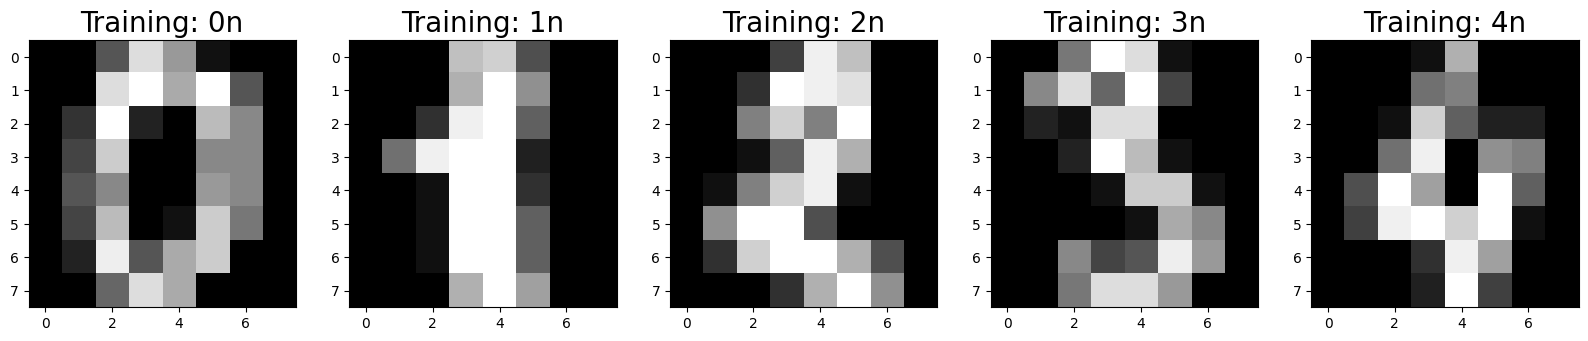

In [4]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
  plt.subplot(1, 5, index + 1)
  plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
  plt.title('Training: %in' % label, fontsize = 20)

In [5]:
# Checking Assumptions for Logistic Regression
# Linearity
# from sklearn.inspection import plot_partial_dependence

### Split the Data into Training and Test Set
Now I will split the data into 75 percent training and 25 percent testing sets. The need to break the data into training and testing sets is to ensure that our classification model can fit properly in the new data.

### Scikit-learn 4 Steps Modelling Pattern(Logistic Regression)
Step one is the import the model that we want to use, As this article is based on the logistic regression so, I will import the logistic regression model from the scikit-learn library in python.

In [6]:
x = digit.drop(['target'], axis=1)
y = digit['target']

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, 
                                                    y, test_size=0.25, 
                                                    random_state=0)

In [8]:
from sklearn.linear_model import LogisticRegression

In [9]:
# Step two is to create an instance of the model, which means that we need to store the Logistic Regression model into a variable.

logisticRegr = LogisticRegression(max_iter=2700)
#Step three will be to train the model. For this, we need the fit the data into our Logistic Regression model.

In [10]:
logisticRegr.fit(x_train, y_train)

LogisticRegression(max_iter=2700)

Step four is to predict the labels for the new data,
In this step, we need to use the information that we learned while training the model.

In [11]:
# Returns a NumPy Array
# Predict for One Observation (image)
logisticRegr.predict(x_test)
logisticRegr.predict(x_test[0:10])
predictions = logisticRegr.predict(x_test)

#### Measure the Accuracy of our Logistic Regression Model
I will measure the Accuracy of our trained Logistic Regressing Model, where Accuracy is defined as the fraction of correct predictions, which is correct predictions/total number of data points.

In [12]:
# Use score method to get accuracy of model
score = logisticRegr.score(x_test, y_test)
print(score)

0.9533333333333334


### Confusion Matrix
Confusion Matrix is the table used in describing the performance of a Classifier that we have trained using the dataset. Here I will use Matplotlib and Seaborn in python to describe the performance of our trained model.

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[37  0  0  0  0  0  0  0  0  0]
 [ 0 40  0  0  0  0  0  0  2  1]
 [ 0  0 41  3  0  0  0  0  0  0]
 [ 0  0  0 44  0  0  0  0  1  0]
 [ 0  0  0  0 37  0  0  1  0  0]
 [ 0  0  0  0  0 46  0  0  0  2]
 [ 0  1  0  0  0  0 51  0  0  0]
 [ 0  0  0  1  1  0  0 46  0  0]
 [ 0  3  1  0  0  0  1  0 43  0]
 [ 0  0  0  0  0  1  0  0  2 44]]


Now let’s visualize our performance using the confusion matrix. First, I will visualize the confusion matrix using the Seaborn library in python.

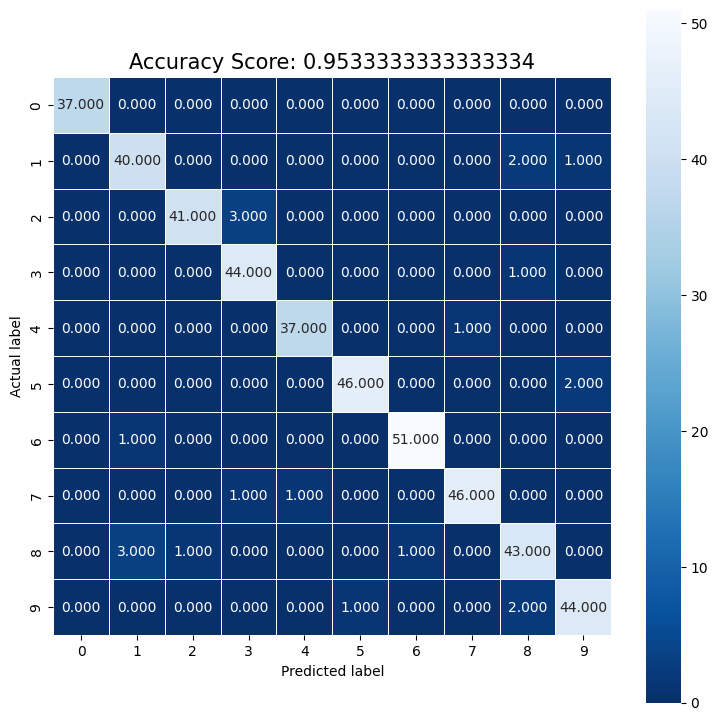

In [14]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15)
plt.show()

Now let’s visualize our Logistic Regression model’s performance with the confusion matrix using the matplotlib library in python.

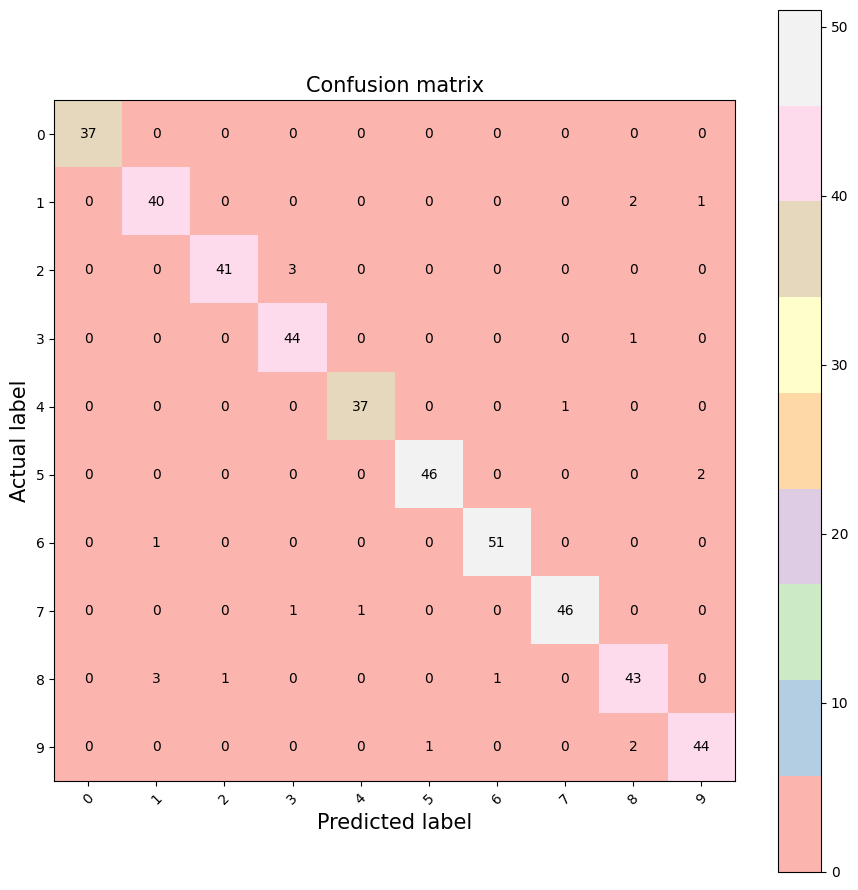

In [15]:
plt.figure(figsize=(9,9))
plt.imshow(cm, interpolation='nearest', cmap='Pastel1')
plt.title('Confusion matrix', size = 15)
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], rotation=45, size = 10)
plt.yticks(tick_marks, ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], size = 10)
plt.tight_layout()
plt.ylabel('Actual label', size = 15)
plt.xlabel('Predicted label', size = 15)
width, height = cm.shape
for x in range(width):
    for y in range(height):
        plt.annotate(str(cm[x][y]), xy=(y, x), 
        horizontalalignment='center',
        verticalalignment='center')

#### Logistic Regression (MNIST)
The Logistic Regression model that you saw above was you give you an idea of how this classifier works with python to train a machine learning model. Now let’s prepare a Logistic Regression model for a real-world example using more significant data to fit our model.

### Load the MNIST Dataset

In [16]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', parser='auto')

Now after loading the MNIST dataset, let’s see some insights into the data.

In [17]:
# These are the images
# There are 70,000 images (28 by 28 images for a dimensionality of 784)
print(mnist.data.shape)
# These are the labels
print(mnist.target.shape)

(70000, 784)
(70000,)


In the output, you will see 70000 images and 70000 labels in this dataset, which sounds very challenging for a real-world problem.

### Split the Data into Training and Testing
Now let’s split the data into training and testing sets. Here I will break the dataset into 60000 images as a training set and 10000 images as a testing set.

Visualize the Data
As I told you earlier, that we need to look at the data before moving forward to see what we need to work with. Here I will visualize the data using the matplotlib library in python.

In [18]:
from sklearn.model_selection import train_test_split
train_img, test_img, train_lbl, test_lbl = train_test_split(
 mnist.data, mnist.target, test_size=1/7.0, random_state=42)

So, this is how you can efficiently train a machine learning model. If you prepare a model in python with Scikit-learn, you will never find it difficult. I hope this article helps you. Feel free to ask questions on Logistic Regression in Machine Learning with Python or any other topic, in the comments section.

## Scikit-Learn Modelling Pattern
Now let’s follow the scikit-learn’s modeling pattern as I did earlier in the above example.

In [19]:
from sklearn.linear_model import LogisticRegression

# all parameters not specified are set to their defaults
# default solver is incredibly slow thats why we change it
logisticRegr = LogisticRegression(solver = 'lbfgs', max_iter=2700)

In [20]:
logisticRegr.fit(train_img, train_lbl)
# Returns a NumPy Array

C:\Users\abhij\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=2700)

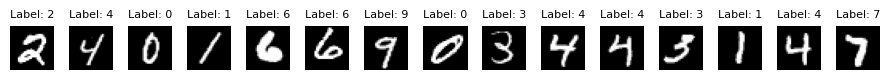

In [21]:
num_images = 15  # Total number of images you want to display

plt.figure(figsize=(9, 9))  # Create a larger figure to accommodate subplots

for index in range(num_images):
    reshaped_image = np.reshape(train_img.values[index], (28, 28))
    label = train_lbl.iloc[index]
    
    plt.subplot(1, num_images, index + 1)
    plt.imshow(reshaped_image, cmap=plt.cm.gray)
    plt.title(f'Label: {label}', fontsize=8)
    plt.axis('off')  # Turn off axis labels and ticks

plt.tight_layout()  # Adjust spacing between subplots
plt.show()


In [22]:
# Predict for One Observation (image)
logisticRegr.predict(test_img.values[0].reshape(1,-1))
logisticRegr.predict(test_img.values)
predictions = logisticRegr.predict(test_img)

C:\Users\abhij\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\abhij\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [23]:
correct_predictions = (predictions == test_lbl)  # Create a boolean array indicating correct predictions
accuracy = correct_predictions.sum() / len(correct_predictions)  # Calculate accuracy

print(f"Accuracy: {accuracy:.2%}")  # Print accuracy as a percentage
test_lbl_r = test_lbl.values
# Display the first few predictions and their corresponding actual labels
for i in range(10):  # Display the first 10 predictions
    print(f"Predicted: {predictions[i]}, Actual: {test_lbl_r[i]}")

Accuracy: 91.62%
Predicted: 8, Actual: 8
Predicted: 4, Actual: 4
Predicted: 5, Actual: 8
Predicted: 7, Actual: 7
Predicted: 7, Actual: 7
Predicted: 0, Actual: 0
Predicted: 6, Actual: 6
Predicted: 2, Actual: 2
Predicted: 7, Actual: 7
Predicted: 7, Actual: 4
